## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9962842	total: 57.6ms	remaining: 57.6s
1:	learn: 0.9773700	total: 59.2ms	remaining: 29.5s
2:	learn: 0.9554009	total: 60.4ms	remaining: 20.1s
3:	learn: 0.9366493	total: 61.4ms	remaining: 15.3s
4:	learn: 0.9214457	total: 62.4ms	remaining: 12.4s
5:	learn: 0.9042394	total: 63.4ms	remaining: 10.5s
6:	learn: 0.8869223	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8706070	total: 65.5ms	remaining: 8.13s
8:	learn: 0.8557808	total: 66.7ms	remaining: 7.35s
9:	learn: 0.8386827	total: 68ms	remaining: 6.73s
10:	learn: 0.8232102	total: 68.9ms	remaining: 6.19s
11:	learn: 0.8088807	total: 69.8ms	remaining: 5.75s
12:	learn: 0.7944673	total: 70.8ms	remaining: 5.38s
13:	learn: 0.7798209	total: 71.9ms	remaining: 5.06s
14:	learn: 0.7675588	total: 72.7ms	remaining: 4.78s
15:	learn: 0.7534709	total: 73.8ms	remaining: 4.54s
16:	learn: 0.7401797	total: 74.7ms	remaining: 4.32s
17:	learn: 0.7282252	total: 75.6ms	remaining: 4.13s
18:	learn: 0.7160215	total: 76.4ms	remaining: 

43:	learn: 0.5057169	total: 104ms	remaining: 2.25s
44:	learn: 0.5005367	total: 105ms	remaining: 2.22s
45:	learn: 0.4933400	total: 106ms	remaining: 2.2s
46:	learn: 0.4885926	total: 107ms	remaining: 2.18s
47:	learn: 0.4829439	total: 109ms	remaining: 2.16s
48:	learn: 0.4774919	total: 110ms	remaining: 2.13s
49:	learn: 0.4720574	total: 111ms	remaining: 2.11s
50:	learn: 0.4659272	total: 112ms	remaining: 2.08s
51:	learn: 0.4607179	total: 113ms	remaining: 2.06s
52:	learn: 0.4558097	total: 115ms	remaining: 2.04s
53:	learn: 0.4523556	total: 116ms	remaining: 2.02s
54:	learn: 0.4473982	total: 116ms	remaining: 2s
55:	learn: 0.4432864	total: 117ms	remaining: 1.98s
56:	learn: 0.4394596	total: 118ms	remaining: 1.96s
57:	learn: 0.4354390	total: 119ms	remaining: 1.94s
58:	learn: 0.4320757	total: 120ms	remaining: 1.92s
59:	learn: 0.4291763	total: 122ms	remaining: 1.91s
60:	learn: 0.4248919	total: 123ms	remaining: 1.89s
61:	learn: 0.4209569	total: 124ms	remaining: 1.87s
62:	learn: 0.4178206	total: 125ms	r

123:	learn: 0.2844462	total: 191ms	remaining: 1.35s
124:	learn: 0.2836460	total: 192ms	remaining: 1.35s
125:	learn: 0.2825420	total: 193ms	remaining: 1.34s
126:	learn: 0.2811066	total: 194ms	remaining: 1.33s
127:	learn: 0.2802630	total: 195ms	remaining: 1.33s
128:	learn: 0.2790086	total: 196ms	remaining: 1.32s
129:	learn: 0.2779095	total: 197ms	remaining: 1.32s
130:	learn: 0.2772431	total: 199ms	remaining: 1.32s
131:	learn: 0.2759430	total: 201ms	remaining: 1.32s
132:	learn: 0.2750460	total: 202ms	remaining: 1.32s
133:	learn: 0.2742613	total: 203ms	remaining: 1.31s
134:	learn: 0.2735263	total: 204ms	remaining: 1.3s
135:	learn: 0.2724792	total: 205ms	remaining: 1.3s
136:	learn: 0.2718093	total: 206ms	remaining: 1.3s
137:	learn: 0.2704625	total: 207ms	remaining: 1.29s
138:	learn: 0.2691270	total: 208ms	remaining: 1.29s
139:	learn: 0.2680543	total: 210ms	remaining: 1.29s
140:	learn: 0.2671966	total: 211ms	remaining: 1.28s
141:	learn: 0.2664293	total: 212ms	remaining: 1.28s
142:	learn: 0.2

211:	learn: 0.2186459	total: 295ms	remaining: 1.09s
212:	learn: 0.2182314	total: 297ms	remaining: 1.1s
213:	learn: 0.2174486	total: 298ms	remaining: 1.09s
214:	learn: 0.2169155	total: 299ms	remaining: 1.09s
215:	learn: 0.2162424	total: 299ms	remaining: 1.09s
216:	learn: 0.2157393	total: 301ms	remaining: 1.08s
217:	learn: 0.2152987	total: 302ms	remaining: 1.08s
218:	learn: 0.2146549	total: 303ms	remaining: 1.08s
219:	learn: 0.2142992	total: 305ms	remaining: 1.08s
220:	learn: 0.2137439	total: 305ms	remaining: 1.08s
221:	learn: 0.2133728	total: 306ms	remaining: 1.07s
222:	learn: 0.2128740	total: 307ms	remaining: 1.07s
223:	learn: 0.2125118	total: 308ms	remaining: 1.07s
224:	learn: 0.2122240	total: 310ms	remaining: 1.07s
225:	learn: 0.2115936	total: 310ms	remaining: 1.06s
226:	learn: 0.2109291	total: 312ms	remaining: 1.06s
227:	learn: 0.2106366	total: 313ms	remaining: 1.06s
228:	learn: 0.2101680	total: 313ms	remaining: 1.05s
229:	learn: 0.2098382	total: 315ms	remaining: 1.05s
230:	learn: 0

297:	learn: 0.1823525	total: 383ms	remaining: 903ms
298:	learn: 0.1820231	total: 384ms	remaining: 900ms
299:	learn: 0.1819081	total: 385ms	remaining: 898ms
300:	learn: 0.1813193	total: 386ms	remaining: 896ms
301:	learn: 0.1809893	total: 387ms	remaining: 894ms
302:	learn: 0.1806136	total: 388ms	remaining: 892ms
303:	learn: 0.1800272	total: 388ms	remaining: 889ms
304:	learn: 0.1795270	total: 390ms	remaining: 888ms
305:	learn: 0.1790404	total: 391ms	remaining: 886ms
306:	learn: 0.1785686	total: 392ms	remaining: 885ms
307:	learn: 0.1783291	total: 393ms	remaining: 883ms
308:	learn: 0.1782108	total: 395ms	remaining: 883ms
309:	learn: 0.1777798	total: 396ms	remaining: 881ms
310:	learn: 0.1775790	total: 397ms	remaining: 879ms
311:	learn: 0.1770757	total: 398ms	remaining: 878ms
312:	learn: 0.1768470	total: 399ms	remaining: 875ms
313:	learn: 0.1767245	total: 400ms	remaining: 874ms
314:	learn: 0.1762865	total: 401ms	remaining: 872ms
315:	learn: 0.1757986	total: 402ms	remaining: 870ms
316:	learn: 

400:	learn: 0.1542245	total: 486ms	remaining: 726ms
401:	learn: 0.1538673	total: 487ms	remaining: 724ms
402:	learn: 0.1537491	total: 488ms	remaining: 723ms
403:	learn: 0.1533132	total: 489ms	remaining: 721ms
404:	learn: 0.1532680	total: 489ms	remaining: 719ms
405:	learn: 0.1530214	total: 490ms	remaining: 717ms
406:	learn: 0.1527090	total: 491ms	remaining: 715ms
407:	learn: 0.1526270	total: 492ms	remaining: 714ms
408:	learn: 0.1522558	total: 493ms	remaining: 712ms
409:	learn: 0.1521801	total: 494ms	remaining: 711ms
410:	learn: 0.1520345	total: 495ms	remaining: 709ms
411:	learn: 0.1519839	total: 496ms	remaining: 707ms
412:	learn: 0.1517912	total: 497ms	remaining: 706ms
413:	learn: 0.1514384	total: 498ms	remaining: 704ms
414:	learn: 0.1509509	total: 499ms	remaining: 703ms
415:	learn: 0.1509194	total: 499ms	remaining: 701ms
416:	learn: 0.1508817	total: 500ms	remaining: 699ms
417:	learn: 0.1508447	total: 501ms	remaining: 698ms
418:	learn: 0.1505731	total: 502ms	remaining: 696ms
419:	learn: 

489:	learn: 0.1354721	total: 574ms	remaining: 597ms
490:	learn: 0.1351865	total: 575ms	remaining: 596ms
491:	learn: 0.1349253	total: 576ms	remaining: 595ms
492:	learn: 0.1345054	total: 577ms	remaining: 593ms
493:	learn: 0.1341810	total: 578ms	remaining: 592ms
494:	learn: 0.1339486	total: 579ms	remaining: 591ms
495:	learn: 0.1338886	total: 580ms	remaining: 590ms
496:	learn: 0.1338032	total: 581ms	remaining: 588ms
497:	learn: 0.1335407	total: 582ms	remaining: 587ms
498:	learn: 0.1332581	total: 583ms	remaining: 585ms
499:	learn: 0.1332236	total: 584ms	remaining: 584ms
500:	learn: 0.1331782	total: 585ms	remaining: 583ms
501:	learn: 0.1329005	total: 586ms	remaining: 581ms
502:	learn: 0.1328708	total: 587ms	remaining: 580ms
503:	learn: 0.1327857	total: 588ms	remaining: 578ms
504:	learn: 0.1323948	total: 589ms	remaining: 577ms
505:	learn: 0.1322329	total: 590ms	remaining: 576ms
506:	learn: 0.1319715	total: 591ms	remaining: 574ms
507:	learn: 0.1317581	total: 592ms	remaining: 573ms
508:	learn: 

592:	learn: 0.1158719	total: 677ms	remaining: 465ms
593:	learn: 0.1156945	total: 678ms	remaining: 464ms
594:	learn: 0.1156777	total: 679ms	remaining: 462ms
595:	learn: 0.1153778	total: 680ms	remaining: 461ms
596:	learn: 0.1151073	total: 681ms	remaining: 460ms
597:	learn: 0.1148641	total: 683ms	remaining: 459ms
598:	learn: 0.1145560	total: 684ms	remaining: 458ms
599:	learn: 0.1143104	total: 684ms	remaining: 456ms
600:	learn: 0.1141082	total: 685ms	remaining: 455ms
601:	learn: 0.1138669	total: 687ms	remaining: 454ms
602:	learn: 0.1136404	total: 688ms	remaining: 453ms
603:	learn: 0.1136156	total: 688ms	remaining: 451ms
604:	learn: 0.1134330	total: 689ms	remaining: 450ms
605:	learn: 0.1131706	total: 690ms	remaining: 449ms
606:	learn: 0.1130353	total: 691ms	remaining: 448ms
607:	learn: 0.1128920	total: 692ms	remaining: 446ms
608:	learn: 0.1125642	total: 693ms	remaining: 445ms
609:	learn: 0.1123703	total: 694ms	remaining: 444ms
610:	learn: 0.1121182	total: 695ms	remaining: 442ms
611:	learn: 

679:	learn: 0.1013154	total: 766ms	remaining: 360ms
680:	learn: 0.1010748	total: 769ms	remaining: 360ms
681:	learn: 0.1008911	total: 770ms	remaining: 359ms
682:	learn: 0.1008780	total: 770ms	remaining: 358ms
683:	learn: 0.1006848	total: 771ms	remaining: 356ms
684:	learn: 0.1005277	total: 772ms	remaining: 355ms
685:	learn: 0.1003134	total: 773ms	remaining: 354ms
686:	learn: 0.1002855	total: 774ms	remaining: 353ms
687:	learn: 0.1000060	total: 775ms	remaining: 352ms
688:	learn: 0.0997726	total: 776ms	remaining: 350ms
689:	learn: 0.0995413	total: 777ms	remaining: 349ms
690:	learn: 0.0992915	total: 778ms	remaining: 348ms
691:	learn: 0.0991347	total: 779ms	remaining: 347ms
692:	learn: 0.0990507	total: 780ms	remaining: 345ms
693:	learn: 0.0988830	total: 780ms	remaining: 344ms
694:	learn: 0.0986443	total: 782ms	remaining: 343ms
695:	learn: 0.0985118	total: 782ms	remaining: 342ms
696:	learn: 0.0983233	total: 783ms	remaining: 340ms
697:	learn: 0.0981839	total: 784ms	remaining: 339ms
698:	learn: 

786:	learn: 0.0860799	total: 868ms	remaining: 235ms
787:	learn: 0.0859369	total: 869ms	remaining: 234ms
788:	learn: 0.0857548	total: 870ms	remaining: 233ms
789:	learn: 0.0856353	total: 871ms	remaining: 232ms
790:	learn: 0.0855111	total: 872ms	remaining: 230ms
791:	learn: 0.0854021	total: 873ms	remaining: 229ms
792:	learn: 0.0853247	total: 874ms	remaining: 228ms
793:	learn: 0.0852505	total: 875ms	remaining: 227ms
794:	learn: 0.0851214	total: 876ms	remaining: 226ms
795:	learn: 0.0849328	total: 877ms	remaining: 225ms
796:	learn: 0.0848026	total: 878ms	remaining: 224ms
797:	learn: 0.0846010	total: 879ms	remaining: 223ms
798:	learn: 0.0844675	total: 880ms	remaining: 221ms
799:	learn: 0.0843407	total: 881ms	remaining: 220ms
800:	learn: 0.0841873	total: 882ms	remaining: 219ms
801:	learn: 0.0840395	total: 883ms	remaining: 218ms
802:	learn: 0.0839157	total: 884ms	remaining: 217ms
803:	learn: 0.0837575	total: 885ms	remaining: 216ms
804:	learn: 0.0836280	total: 885ms	remaining: 214ms
805:	learn: 

876:	learn: 0.0759140	total: 957ms	remaining: 134ms
877:	learn: 0.0758633	total: 959ms	remaining: 133ms
878:	learn: 0.0757975	total: 960ms	remaining: 132ms
879:	learn: 0.0757322	total: 961ms	remaining: 131ms
880:	learn: 0.0756002	total: 962ms	remaining: 130ms
881:	learn: 0.0754871	total: 963ms	remaining: 129ms
882:	learn: 0.0753435	total: 963ms	remaining: 128ms
883:	learn: 0.0752156	total: 964ms	remaining: 127ms
884:	learn: 0.0751312	total: 965ms	remaining: 125ms
885:	learn: 0.0749328	total: 966ms	remaining: 124ms
886:	learn: 0.0747606	total: 967ms	remaining: 123ms
887:	learn: 0.0746382	total: 968ms	remaining: 122ms
888:	learn: 0.0745536	total: 970ms	remaining: 121ms
889:	learn: 0.0744733	total: 971ms	remaining: 120ms
890:	learn: 0.0744247	total: 972ms	remaining: 119ms
891:	learn: 0.0742851	total: 973ms	remaining: 118ms
892:	learn: 0.0742395	total: 973ms	remaining: 117ms
893:	learn: 0.0741256	total: 974ms	remaining: 116ms
894:	learn: 0.0739477	total: 975ms	remaining: 114ms
895:	learn: 

979:	learn: 0.0665263	total: 1.06s	remaining: 21.6ms
980:	learn: 0.0664715	total: 1.06s	remaining: 20.6ms
981:	learn: 0.0664078	total: 1.06s	remaining: 19.5ms
982:	learn: 0.0662554	total: 1.06s	remaining: 18.4ms
983:	learn: 0.0661691	total: 1.06s	remaining: 17.3ms
984:	learn: 0.0660723	total: 1.06s	remaining: 16.2ms
985:	learn: 0.0659864	total: 1.07s	remaining: 15.2ms
986:	learn: 0.0658386	total: 1.07s	remaining: 14.1ms
987:	learn: 0.0657522	total: 1.07s	remaining: 13ms
988:	learn: 0.0656917	total: 1.07s	remaining: 11.9ms
989:	learn: 0.0656170	total: 1.07s	remaining: 10.8ms
990:	learn: 0.0656022	total: 1.07s	remaining: 9.74ms
991:	learn: 0.0654563	total: 1.07s	remaining: 8.65ms
992:	learn: 0.0653560	total: 1.07s	remaining: 7.57ms
993:	learn: 0.0652331	total: 1.07s	remaining: 6.49ms
994:	learn: 0.0651428	total: 1.07s	remaining: 5.41ms
995:	learn: 0.0651269	total: 1.08s	remaining: 4.33ms
996:	learn: 0.0649390	total: 1.08s	remaining: 3.24ms
997:	learn: 0.0648665	total: 1.08s	remaining: 2.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

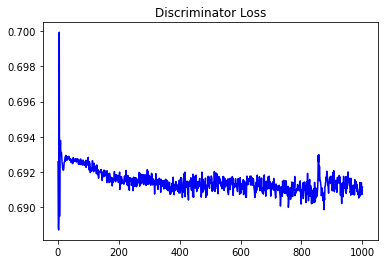

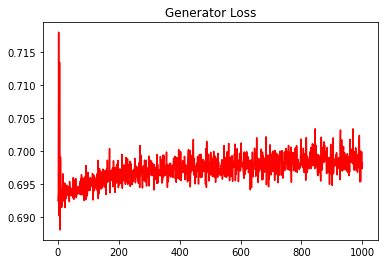

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19916139063979457


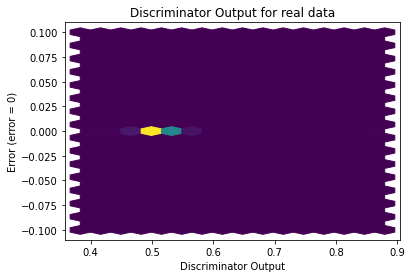

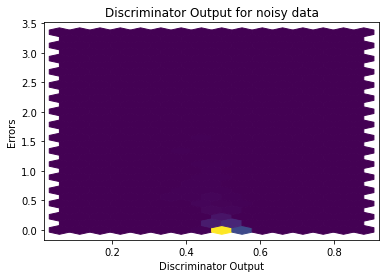

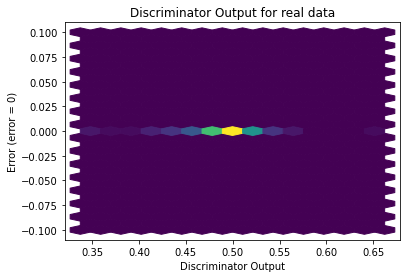

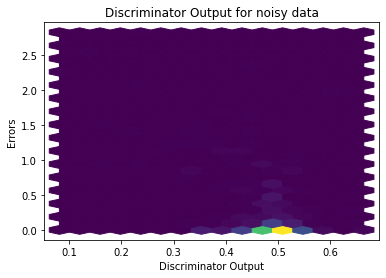

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


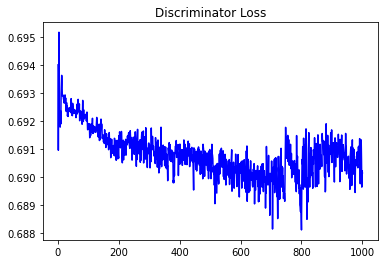

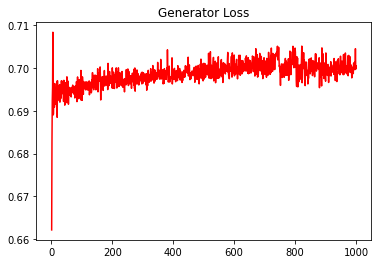

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12054350639652464


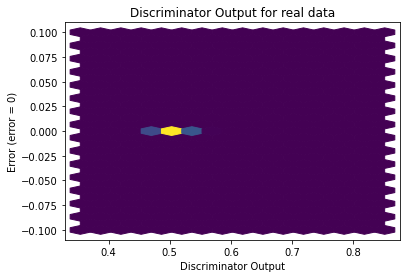

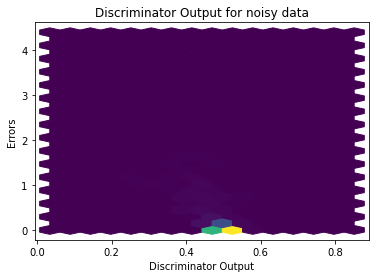

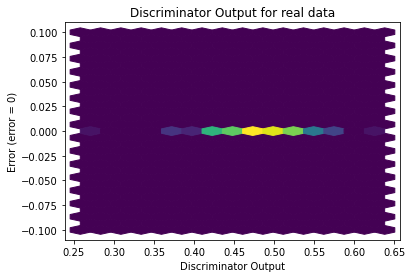

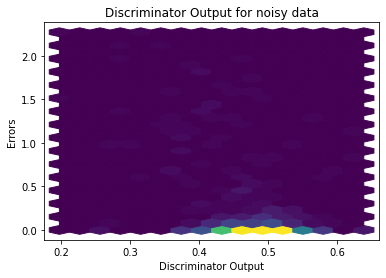

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9902]], requires_grad=True)
